# LOAN DATA FROM PROSPER
## by Azubuogu Peace Udoka

<ul>
<li><a href="#wrangle">Preliminary Wrangling</a></li>
<li><a href="#uni">Univariate Exploration</a></li>
<li><a href="#bi">Bivariate Exploration</a></li>
<li><a href="#multi">Multivariate Exploration</a></li>
<li><a href="#end">Conclusion</a></li>

</ul>

## Introduction
This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

This [data dictionary](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0) explains the variables in the data set.



<a id = "wrangle"></a>
## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
#set general style of plots
sns.set(rc = {'figure.figsize':(20,8)}, style="white", font_scale=1.2)
# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load dataset
data = pd.read_csv("prosperLoanData.csv") 
print(data.shape)
data.head()

(113937, 81)


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
#list of columns
data.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

### What is the structure of this dataset?

The Prosper Loan Dataset is made of 113,937 rows of observations on loan with 81 columns describing features of each loan.

### What is the main feature of interest?

I am interested in the factors that affect a loan's outcome status.

### What features in the dataset will help support my investigation of the loan's outcome status?
The following variables are factors that are likely to affect a loan's outcome status:
- LoanStatus: The current status of the loan: Cancelled,  Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.
- BorrowerAPR: The Borrower's Annual Percentage Rate (APR) for the loan.
- ProsperRating: 0 - N/A, 1 - HR, 2 - E, 3 - D, 4 - C, 5 - B, 6 - A, 7 - AA.  Applicable for loans originated after July 2009.
- ListingCategory (numeric): 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans
- EmploymentStatus
- IsBorrowerHomeowner
- CurrentlyInGroupL: Specifies whether or not the Borrower was in a group at the time the listing was created.
- TotalCreditLinespast7years
- IncomeRange
- IncomeVerifiable
- TotalProsperLoans: This value will be null if the borrower had no prior loans. 
- OnTimeProsperPayments
- LoanOriginalAmount
- Recommendations

These variables will be studied to know which are more likely to affect a loan's outcome status.




Let's trim the dataset to these variables of interest and check the summary statistics.



In [4]:
    #first, rename the ProsperRating (numeric) column to ProperRating to avoid errors that could occur due to the space.
    #Note, you can use backicks quoting (`...`) instead however, I would rather just have a shorter column name to work with

    data = data.rename(columns = {"ListingCategory (numeric)": "ListingCategory"})
    data = data.rename(columns = {"ProsperRating (numeric)": "ProsperRating"})

    #trim the dataset and select columns of interest into anew DataFrame

    loan_data = data[["LoanStatus", "BorrowerAPR", "ProsperRating", "ListingCategory", "EmploymentStatus", "IsBorrowerHomeowner", "CurrentlyInGroup", "TotalCreditLinespast7years", "IncomeRange", "IncomeVerifiable", "TotalProsperLoans", "OnTimeProsperPayments", "LoanOriginalAmount", "Recommendations"]]
    loan_data.head()

,LoanStatus,BorrowerAPR,ProsperRating,ListingCategory,EmploymentStatus,IsBorrowerHomeowner,CurrentlyInGroup,TotalCreditLinespast7years,IncomeRange,IncomeVerifiable,TotalProsperLoans,OnTimeProsperPayments,LoanOriginalAmount,Recommendations
0,Completed,0.16516,NaN,0,Self-employed,True,True,12.0,"$25,000-49,999",True,NaN,NaN,9425,0
1,Current,0.12016,6.0,2,Employed,False,False,29.0,"$50,000-74,999",True,NaN,NaN,10000,0
2,Completed,0.28269,NaN,0,Not available,False,True,3.0,Not displayed,True,NaN,NaN,3001,0
3,Current,0.12528,6.0,16,Employed,True,False,29.0,"$25,000-49,999",True,NaN,NaN,10000,0
4,Current,0.24614,3.0,2,Employed,True,False,49.0,"$100,000+",True,1.0,11.0,15000,0


In [5]:
#info
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 14 columns):
LoanStatus                    113937 non-null object
BorrowerAPR                   113912 non-null float64
ProsperRating                 84853 non-null float64
ListingCategory               113937 non-null int64
EmploymentStatus              111682 non-null object
IsBorrowerHomeowner           113937 non-null bool
CurrentlyInGroup              113937 non-null bool
TotalCreditLinespast7years    113240 non-null float64
IncomeRange                   113937 non-null object
IncomeVerifiable              113937 non-null bool
TotalProsperLoans             22085 non-null float64
OnTimeProsperPayments         22085 non-null float64
LoanOriginalAmount            113937 non-null int64
Recommendations               113937 non-null int64
dtypes: bool(3), float64(5), int64(3), object(3)
memory usage: 8.6+ MB


Notice that there are a few missing values in some columns.
1. The borrowerAPR column has some missing values. Let's fix that.
> Some other columns have missing values however, these will be addressed later if they pose a problem for analysis.

In [6]:
#remove rows with missing APR values
loan_data = loan_data.dropna(subset = ["BorrowerAPR"])

Awesome, now let's perform summary statistics on the dataset to get an overview 

In [7]:
#summary statistics
loan_data.describe()

,BorrowerAPR,ProsperRating,ListingCategory,TotalCreditLinespast7years,TotalProsperLoans,OnTimeProsperPayments,LoanOriginalAmount,Recommendations
count,113912.000000,84853.000000,113912.000000,113240.000000,22085.000000,22085.000000,113912.000000,113912.000000
mean,0.218828,4.072243,2.774817,26.754539,1.421100,22.271949,8338.015661,0.048037
std,0.080364,1.673227,3.997024,13.637871,0.764042,18.830425,6245.940592,0.332389
min,0.006530,1.000000,0.000000,2.000000,0.000000,0.000000,1000.000000,0.000000
25%,0.156290,3.000000,1.000000,17.000000,1.000000,9.000000,4000.000000,0.000000
50%,0.209760,4.000000,1.000000,25.000000,1.000000,15.000000,6500.000000,0.000000
75%,0.283810,5.000000,3.000000,35.000000,2.000000,32.000000,12000.000000,0.000000
max,0.512290,7.000000,20.000000,136.000000,8.000000,141.000000,35000.000000,39.000000


From the summary statistics above, we can see the average, and percentiles of the numerical columns. You can see that about 75% of the borrowers had zero recommendations. We'll see more about this later.
Let's explore the dataset.

<a id = "uni"></a>
## Univariate Exploration

The feature of interest in this analysis is the LoanStatus. Let's see it's distribution in this dataset.


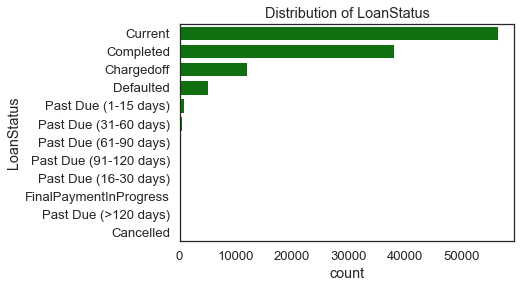

In [8]:
# loanstatus is qualitative and so a barplot is used. Since it's nominal data, the plot is sorted in descending order.

sns.countplot(data = loan_data, y = "LoanStatus", color = "green", order = loan_data["LoanStatus"].value_counts().index);
plt.title("Distribution of LoanStatus");

Majority of the loans recorded are either, current, completed, chargedoff, or defaulted. Only very few are past due or cancelled. The exact values can be seen below. 
> Note: The shape of the distribution does not need transformtion as the data is not quantitative.

In [9]:
loan_data["LoanStatus"].value_counts()

Current                   56576
Completed                 38049
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

Our major interest then would be on**chargedoff and defaulted loans**.


Let's check the employment status of the borrowers

In [10]:
#to plot EmploymentStatus, we must first fill all missing values with "Not Available" to avoid errors
loan_data.EmploymentStatus.fillna("Not available", inplace = True)
loan_data.EmploymentStatus.isna().sum()

0

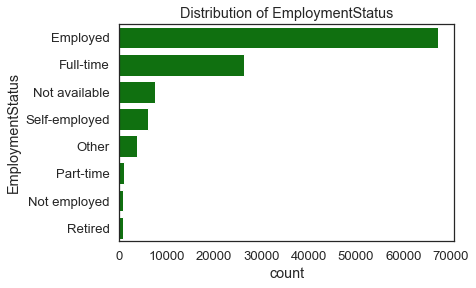

In [11]:
sns.countplot(data = loan_data, y = "EmploymentStatus", color = "green", order = loan_data["EmploymentStatus"].value_counts().index);
plt.title("Distribution of EmploymentStatus");

Majority of the borrowers are employed and working full-time. Let's see how this compares with income range

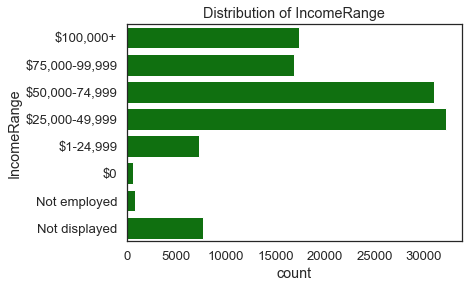

In [12]:
#the range is categorical and should be arranged as such.
income_range = ["$100,000+", "$75,000-99,999", "$50,000-74,999", "$25,000-49,999", "$1-24,999", "$0", "Not employed", "Not displayed"]
order = pd.api.types.CategoricalDtype(ordered = True, categories = income_range)
loan_data["IncomeRange"] = loan_data["IncomeRange"].astype(order)

# plotting categorized income range
sns.countplot(data = loan_data, y = "IncomeRange", color = "green");
plt.title("Distribution of IncomeRange");

Majority of the borrowers had income ranging from 25,000 to 75,000. How does this vary loanoriginal amount and loan status will be studied later on.

Notice that loans were given to persons who were unemployed and not earning, however, just very few. Could this be as a result of other factors like owning a home or mortgage to a home? And how did the loan turn out? Further analysis will tell us this.

<a id = "bi"></a>
## Bivariate Exploration
**How many homeowners were unemployed?**

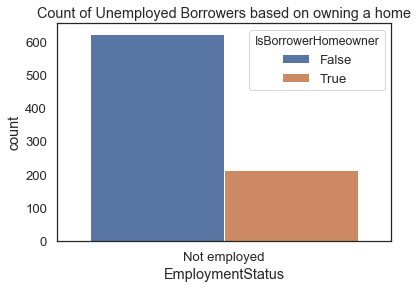

In [13]:
unemployed = loan_data[loan_data["EmploymentStatus"]=="Not employed"]
sns.countplot(data = unemployed, x = "EmploymentStatus", hue = "IsBorrowerHomeowner");
plt.title("Count of Unemployed Borrowers based on owning a home");

The number of unemployed borrowers who own a home is more than twice as much than those who don't.
Let's see how this relates to the loan status.

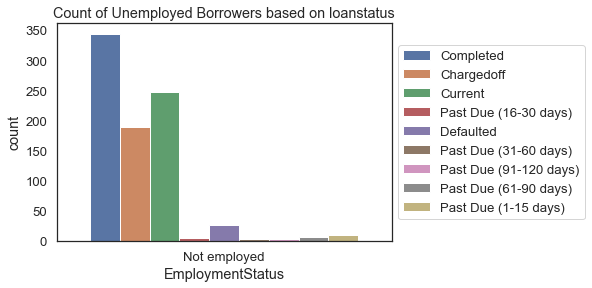

In [14]:
unemployed = loan_data[loan_data["EmploymentStatus"]=="Not employed"]
sns.countplot(data = unemployed, x = "EmploymentStatus", hue = "LoanStatus");
plt.title("Count of Unemployed Borrowers based on loanstatus");

# Put the legend to the right of the current axis
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

Despite being unemployed, majority of unemployed borrowers loans were completed, chargedoff and current. The high number of home owners among the unemployed population could suggest that this was the reason why they were given the loans in the first place and why majority could pay off. Note that a good percentage of this population had their loans charged off. Hence, there could be another underlying factor.



Let's see how the LoanStatus varies with the quantitative variables: BorrowerAPR, ProsperRating, ListingCategory, TotalCreditLinespast7years, TotalProsperLoans, OnTimeProsperPayments, LoanOriginalAmount, Recommendations

**Are certain LoanStatuses associated with a lower or higher value of these variables?**


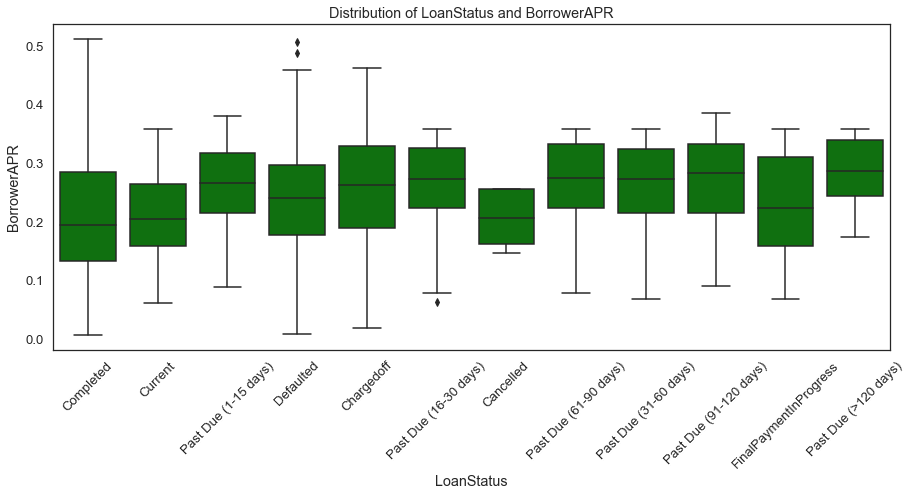

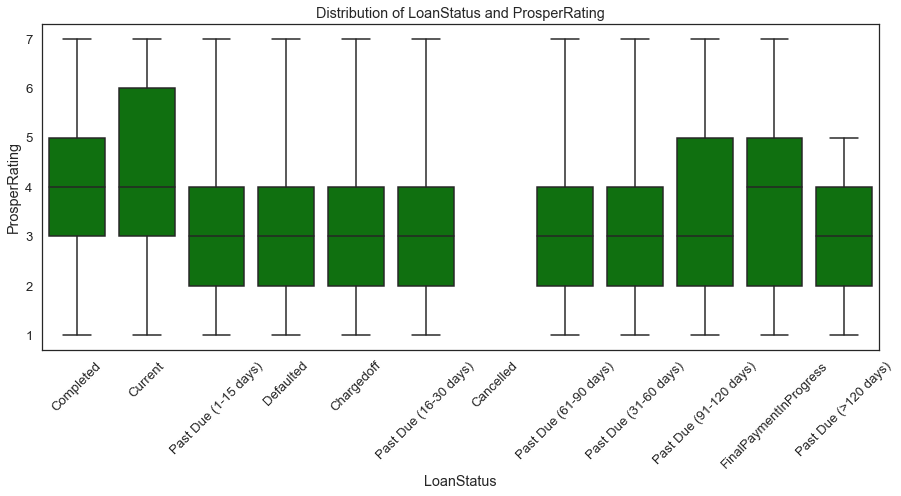

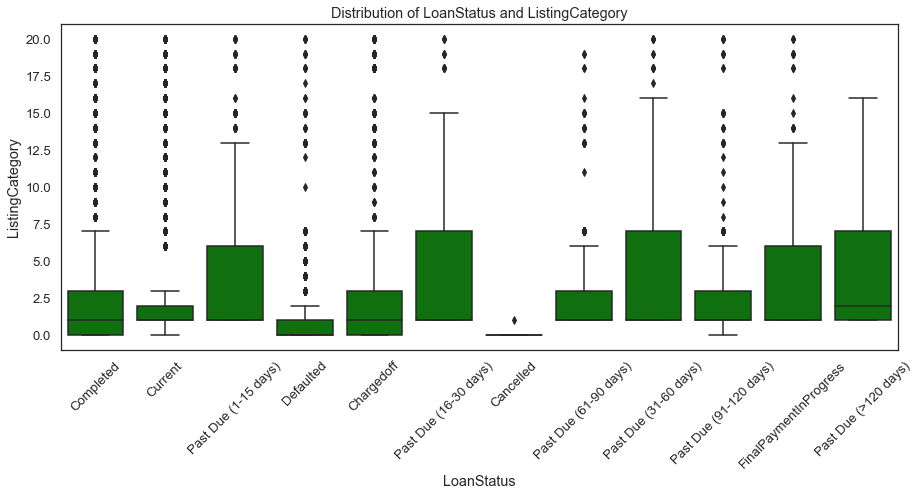

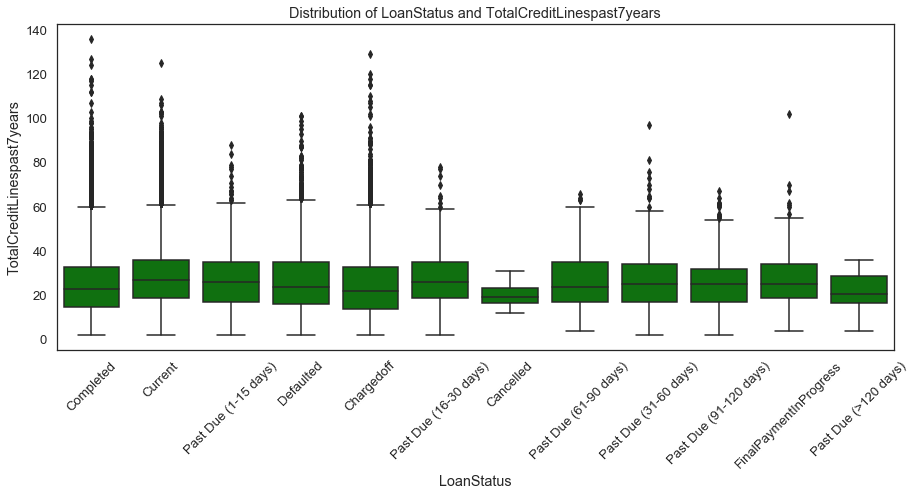

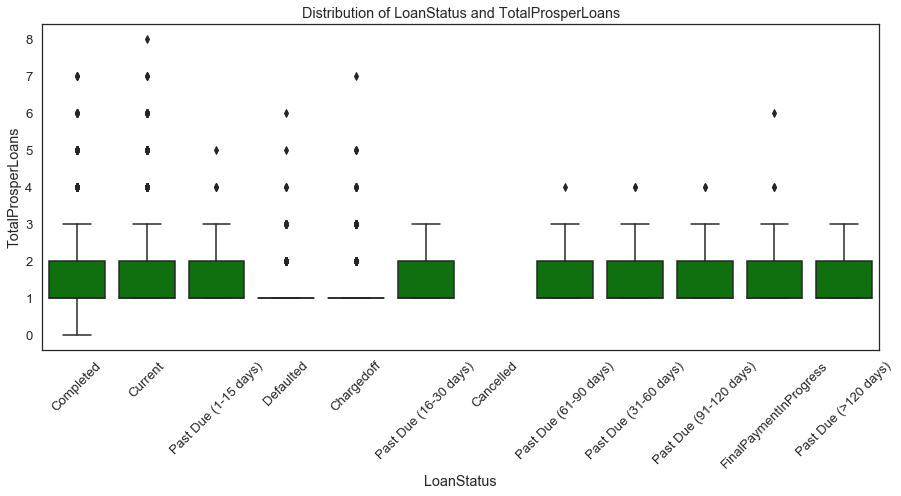

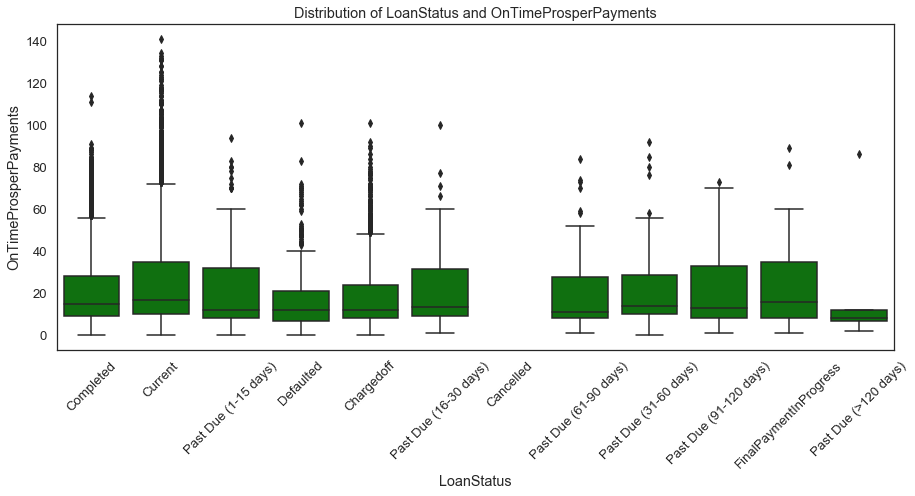

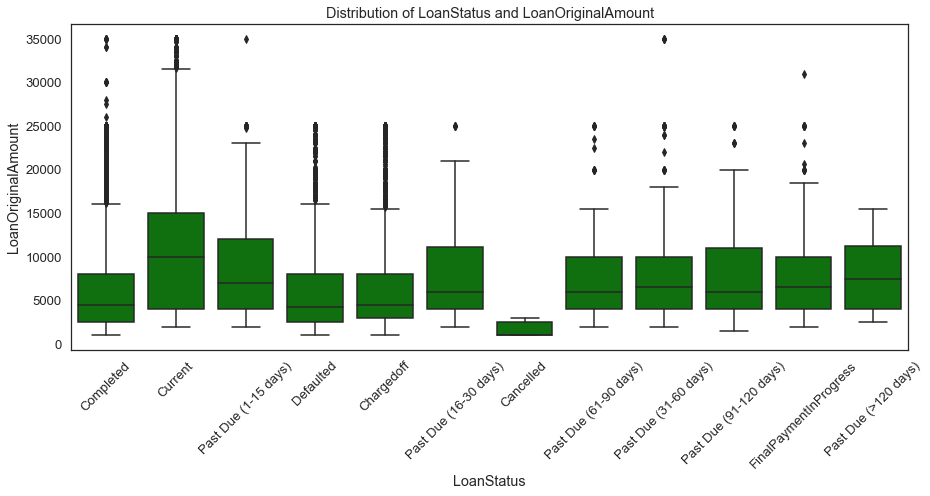

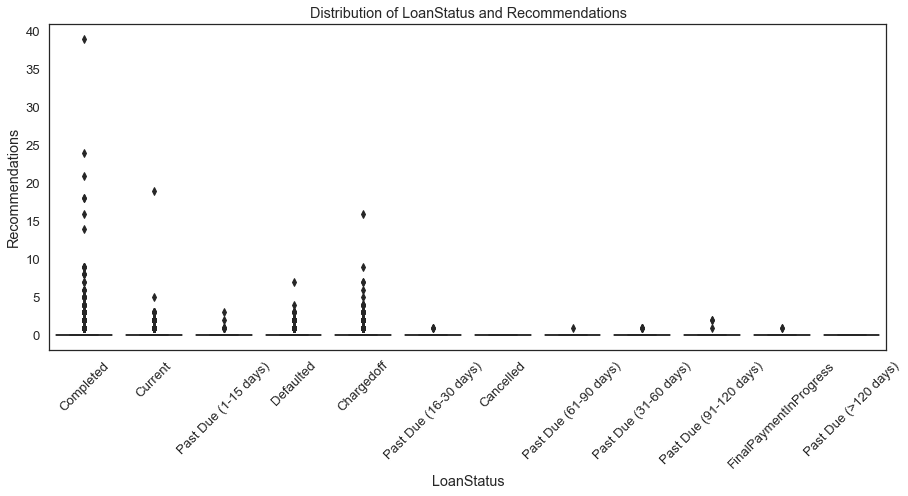

In [15]:
list = ["BorrowerAPR", "ProsperRating", "ListingCategory", "TotalCreditLinespast7years", "TotalProsperLoans", "OnTimeProsperPayments", "LoanOriginalAmount", "Recommendations"]

for i in range(len(list)):
    plt.figure(figsize=(15,6))
    sns.boxplot(data = loan_data, x = "LoanStatus", y = list[i], color = "green");
    plt.title("Distribution of LoanStatus and {}".format(list[i]));
    plt.xticks(rotation = 45);
    plt.show()

The following observations were made from the visualizations

1. The lowest average APR were for loans that were Completed, Current, Cancelled and FinalPayment in Progress. The others which are past due or defaulted had higher APRs.
2. The ProsperRating didnt show much variations across the LoanStatus, however, loans that were past due had a lower ProsperRating on average and those that were Completed, Current, Cancelled and FinalPayment in Progress had a slightly higher average ProsperRating.
3. The ListingCategory shows a lot of outliers and no clear pattern. This is because it is a categorical data and will need to ordered as such before plotting.
4. The average and range of Total CreditLines over the past 7 years and the TotalProsperLoan are almost the same across all loan status. There is no clear pattern.
5. Loans with Cancelled status were Loans of small amounts.
6. Majority had zero recommendations and so this column won't be necessary for analysis.

>The loans with status Completed, Cancelled and FinalPaymentinProgress seem to have lower BorrowerAPR, LoanOriginalAmount and a higher ProsperRating. The loans with Defaulted status had higher APRs. Since our main focus is on Charged off and Defaulted Loans. Let's look more into these.


<a id = "multi"></a>
## Multivariate Exploration
We'll be focusing on three major statuses: Defaulted, Chargedoff,and Cancelled.


C:\ProgramData\Anaconda3\New folder (3)\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


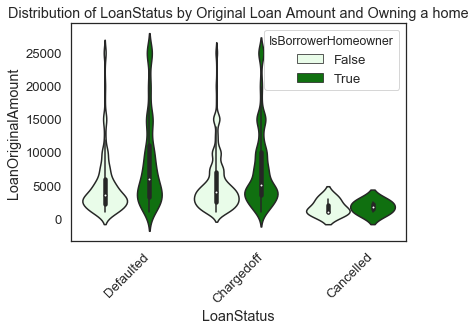

In [16]:
#filter the dataset to get loans with status of interest
list = ["Defaulted", "Chargedoff", "Cancelled"]
loan_data = loan_data[loan_data["LoanStatus"].isin(list)]

# plot the distribution the loanstatus of interest and original amount and see how it varies with home ownership
sns.violinplot(data = loan_data,y= "LoanOriginalAmount", x = "LoanStatus", color = "green", hue = "IsBorrowerHomeowner");
plt.xticks(rotation = 45);
plt.title("Distribution of LoanStatus by Original Loan Amount and Owning a home");

The distributions for either case of IsBorrowerHomeowner are very similar. So theres no strong relation there. It still remains that a cancelled loan is most likely a loan of a small amount.
Ler's see how being in a group affects this instead.

C:\ProgramData\Anaconda3\New folder (3)\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


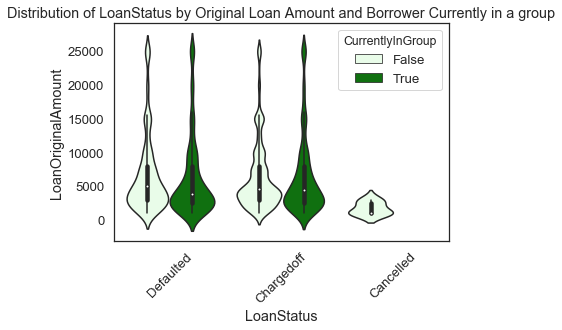

In [17]:
# plot the distribution the loanstatus of interest and original amount and see how it varies with being in a group
sns.violinplot(data = loan_data,y= "LoanOriginalAmount", x = "LoanStatus", color = "green", hue = "CurrentlyInGroup");
plt.xticks(rotation = 45);
plt.title("Distribution of LoanStatus by Original Loan Amount and Borrower Currently in a group");

The distributions for either case of CurrentlyInGroup are very similar. So there's also no strong relation there.

Let's look into another set of variables.

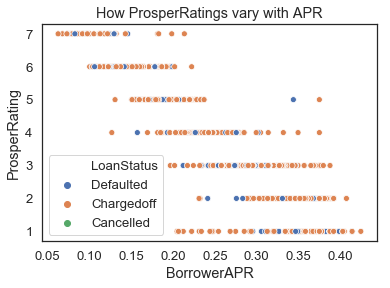

In [18]:
#plot of prosper ratings and borrower APR
sns.scatterplot(data = loan_data,y= "ProsperRating", x = "BorrowerAPR",hue = "LoanStatus");
plt.title("How ProsperRatings vary with APR");

There appears to be a negative correlation between ProsperRating and BorrowerAPR for charged off loans. That is, higher
Prosperratings on Chargedoff loans are associated with higher APR. Considering the previous visualization, we can say that most loans that are charged off are most likely loans of small amounts, and high rating irrespective of if the borrower has a home or is currently in a group.

Next, let's explore more variables  for variations in the defaulted loan status.

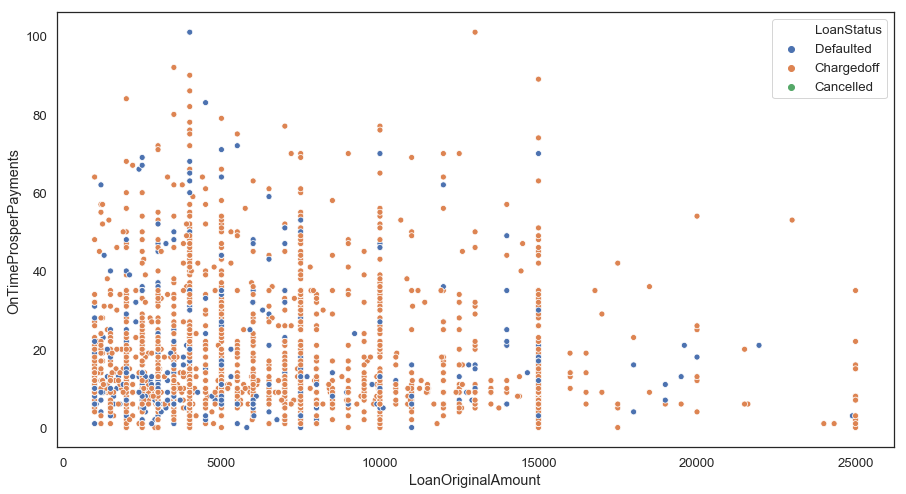

In [20]:
plt.figure(figsize = (15,8))

sns.scatterplot(data = loan_data,x= "LoanOriginalAmount", y = "OnTimeProsperPayments",color = "green", hue = "LoanStatus");
plt.title("Relationship Between Loan Original AMount and Ontime Payments")

For charged off and defaulted loans of small amounts, the borrower had a history of few on time Payments. To fully understand the effect, let's see how ontime payments relate with number of prosper loans on the borrower's record. 

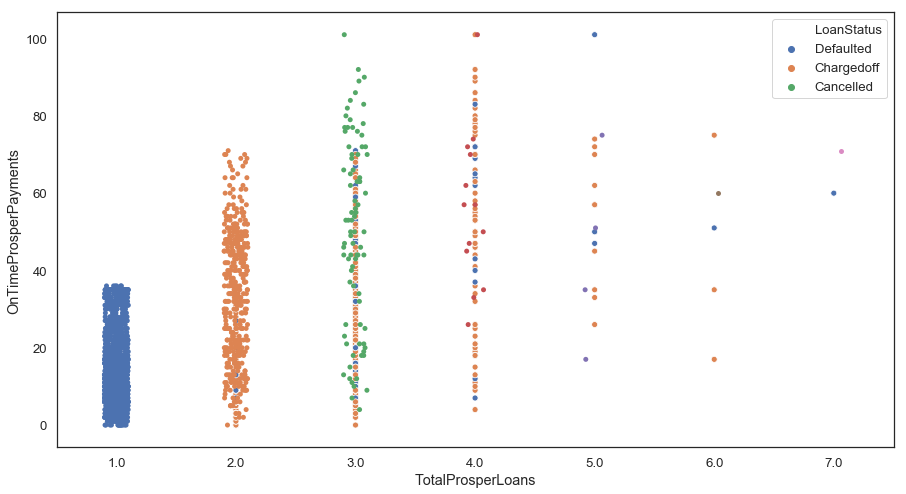

In [21]:
plt.figure(figsize = (15,8))

sns.scatterplot(data = loan_data,x= "TotalProsperLoans", y = "OnTimeProsperPayments",color = "green", hue = "LoanStatus");
sns.stripplot(data = loan_data,x= "TotalProsperLoans", y = "OnTimeProsperPayments");

In [22]:
loan_data["TotalProsperLoans"].mean()

1.2538712306438469

With majority falling betwwen 1 and 2 prosperloans, Let's adjust the scale to better see the distribution in these areas.

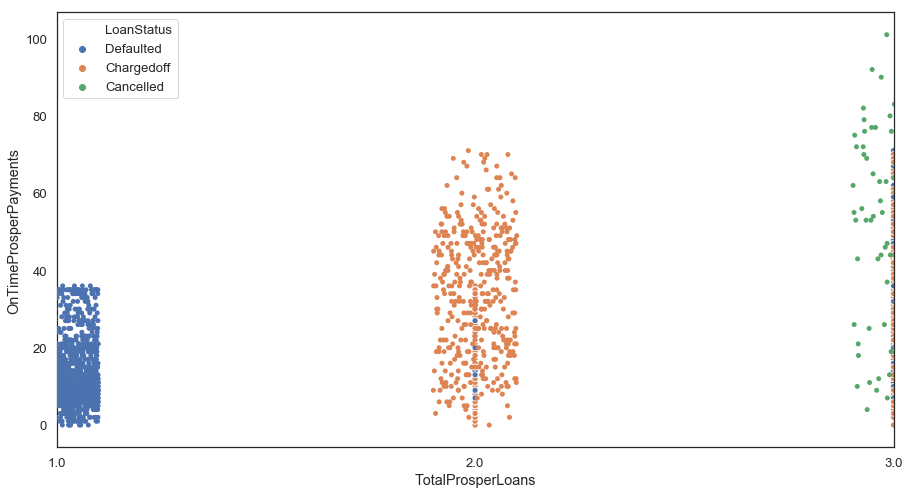

In [23]:
plt.figure(figsize = (15,8))

sns.scatterplot(data = loan_data,x= "TotalProsperLoans", y = "OnTimeProsperPayments",color = "green", hue = "LoanStatus");
sns.stripplot(data = loan_data,x= "TotalProsperLoans", y = "OnTimeProsperPayments");
plt.xlim([0,2]);


We can clearly see that most borrowers with defaulted loans had just one total prosper loan and a small range of ontme payments while those with charged off loans had two or more total proper loans and a higher range of on time payments.

<a id = "end"></a>
## Conclusion
The following conclusions were derived from the analysis of the LoanData From Prosper:

1. Majority of unemployed borrowers owned a home and had completed their loans.
2. Borrowers with defaulted loans are associated with small number of total prosperloans and small range of on time payments.
3. A good amount of unemployed borrowers whose loans were charged off were loans of small amounts and high APR and a higher range of ontime payments.